## TF-IDF

In [1]:
import pandas as pd
content = pd.read_csv('sqlResult_1558435.csv', encoding='gb18030')

In [2]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [3]:
content.iloc[0]

id                                                     89617
author                                                   NaN
source                                快科技@http://www.kkj.cn/
content    此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...
feature    {"type":"科技","site":"cnbeta","commentNum":"37"...
title                                   小米MIUI 9首批机型曝光：共计15款
url           http://www.cnbeta.com/articles/tech/623597.htm
Name: 0, dtype: object

In [4]:
content.iloc[0]['content']

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [5]:
import jieba
def cut(string):
    return list(jieba.cut(string))

In [6]:
content_cutted = cut(content.iloc[0]['content'])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Mark\AppData\Local\Temp\jieba.cache
Loading model cost 0.839 seconds.
Prefix dict has been built succesfully.


In [7]:
from collections import Counter

In [8]:
content_counted = Counter(content_cutted)

In [9]:
content_counted.most_common()[:30]

[('，', 9),
 ('。', 4),
 ('MIUI', 3),
 (' ', 3),
 ('\r\n', 3),
 ('（', 2),
 ('6', 2),
 ('月', 2),
 ('）', 2),
 ('机型', 2),
 ('发布', 2),
 ('精力', 2),
 ('也', 2),
 ('是', 2),
 ('9', 2),
 ('的', 2),
 ('此外', 1),
 ('自', 1),
 ('本周', 1),
 ('12', 1),
 ('日', 1),
 ('起', 1),
 ('除', 1),
 ('小米', 1),
 ('手机', 1),
 ('等', 1),
 ('15', 1),
 ('款', 1),
 ('外', 1),
 ('其余', 1)]

In [10]:
content = content.fillna('')
all_news = content['content']

In [11]:
from tqdm import tqdm_notebook
all_occurences = []
for c in tqdm_notebook(all_news, total = len(all_news)):
    all_occurences.append(set(cut(c)))

In [12]:
def TF(term, cutted_passage):
    all_count = len(cutted_passage)
    return cutted_passage.count(term)/all_count

In [13]:
D = len(all_occurences)

In [14]:
import math

In [15]:
def IDF(term):
    term_count = 0
    for passage_terms in all_occurences:
        if term in passage_terms:
            term_count += 1
    eps = 1e-6
    term_count += eps
    return math.log10(D/term_count)

In [16]:
def TF_IDF(term, cutted_passage):
    return TF(term, cutted_passage) * IDF(term)

In [17]:
TF_IDF('小米', content_cutted)

0.02847245426604233

In [27]:
TF_IDF('月', content_cutted) # 在第一篇文章中，小米 比 月 更关键（虽然 月 出现了2次，而 小米 出现了一次）

0.0007236957913959445

In [24]:
def get_words_importance(cut_words):
    importance = {
        w: TF_IDF(w, cut_words) for w in set(cut_words)
    }
    
    return sorted(importance.items(), key=lambda x: x[1], reverse=True)

## Word Cloud

In [37]:
with open('news.txt','r',encoding='utf-8') as news_file:
    news_content = news_file.read()

In [45]:
cutted = cut(news_content)

In [54]:
words_imp = get_words_importance(cutted)

In [89]:
import matplotlib.pyplot as plt
import wordcloud as wc

%matplotlib inline

In [90]:
def plot_word_cloud_by_importance(importance):
    wc_instance = wc.WordCloud(font_path='../others/SimHei.ttf')
    plt.imshow(wc_instance.generate_from_frequencies({w: fre for w, fre in importance}))

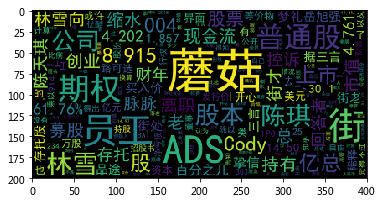

In [91]:
plot_word_cloud_by_importance(words_imp)

## Related Words

### Pre-process -> Cutting Words -> Modeling

In [93]:
import re

In [122]:
corpus_list = []
for index, row in tqdm_notebook(content.iterrows(), total = content.count()['content']):
    corpus_list += cut(''.join(re.findall(r'[\w\d]+', row['content'])))

In [123]:
with open('all_cut_words.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(corpus_list))

In [126]:
from gensim.models import Word2Vec as w2v
from gensim.models.word2vec import LineSentence

In [127]:
news_w2v_model = w2v(sentences=LineSentence(source='all_cut_words.txt'))

In [128]:
news_w2v_model.most_similar("中国")

D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('我国', 0.6481136083602905),
 ('大陆', 0.5534718632698059),
 ('国内', 0.5511694550514221),
 ('中国政府', 0.5297147035598755),
 ('中方', 0.5290654897689819),
 ('海外', 0.5144570469856262),
 ('亚洲', 0.5137262940406799),
 ('芬兰', 0.4948243498802185),
 ('丝绸之路', 0.4851592481136322),
 ('世界', 0.4809659719467163)]

In [132]:
from collections import defaultdict


def get_related_words(initial_words, model):
    max_size = 500
    seen = defaultdict(int)
    unseen = [initial_words]
    
    while unseen and len(seen) < max_size:
        node = unseen.pop(0)

        new_expanding = [w for w, s in model.most_similar(node, topn=20)]
        
        unseen += new_expanding
        
        seen[node] += 1  
        
    return seen

In [133]:
related_words = get_related_words("中国", news_w2v_model)

D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if sys.path[0] == '':


In [134]:
related_words

defaultdict(int,
            {'中国': 7,
             '我国': 8,
             '大陆': 6,
             '国内': 6,
             '中国政府': 4,
             '中方': 5,
             '海外': 6,
             '亚洲': 11,
             '芬兰': 4,
             '丝绸之路': 2,
             '世界': 6,
             '各国': 4,
             '本国': 5,
             '全世界': 7,
             '非洲': 7,
             '欧洲': 11,
             '香港': 4,
             '马来西亚': 2,
             '中企': 2,
             '外国': 4,
             '台湾': 4,
             '全国': 8,
             '我省': 4,
             '国民经济': 3,
             '全球': 8,
             '全省': 4,
             '知识产权': 2,
             '工信部': 1,
             '生产力': 2,
             '核心技术': 3,
             '自主': 3,
             '国产': 1,
             '5G': 2,
             '新型': 2,
             '全市': 4,
             '服务业': 3,
             '产业化': 2,
             '消费市场': 1,
             '青蒿素': 1,
             '内地': 3,
             '台商': 2,
             '两岸': 3,
             '台胞': 2,
             '两

## Part of Speech(词类，词性）

In [135]:
from jieba import posseg

for p in posseg.cut(news_content):
    print('\t{}'.format(p))

	25/m
	倍/m
	稀释/v
	股权/n
	，/x
	蘑菇/n
	街/n
	员工/n
	“/x
	财富/n
	自由/a
	梦/n
	”/x
	破灭/v
	
/x
	这/r
	或许/d
	也/d
	在/p
	提醒/v
	创业/n
	公司/n
	应该/v
	重视/v
	信息/n
	透明度/n
	，/x
	有/v
	责任/n
	去/v
	告知/v
	员工/n
	股份/n
	比例/n
	以及/c
	目前/t
	的/uj
	估值/n
	情况/n
	，/x
	再/d
	由/p
	员工/n
	自己/r
	去/v
	选择/v
	是否/v
	陪伴/n
	公司/n
	走/v
	完/v
	后面/f
	的/uj
	路/n
	。/x
	
/x
	
/x
	陈天琪/nr
	 /x
	2018/m
	//x
	12/m
	//x
	13/m
	 /x
	10/m
	:/x
	20/m
	浏览/v
	 /x
	30.1/m
	W/eng
	来源/n
	：/x
	界面/n
	新闻/n
	字体/n
	：/x
	宋/nr
	
/x
	
/x
	
/x
	
/x
	蘑菇/n
	街上/s
	市/n
	的/uj
	高光/n
	时刻/n
	过去/t
	还/d
	没/v
	几天/m
	，/x
	就/d
	突然/ad
	被/p
	推到/v
	了/ul
	舆论/n
	的/uj
	风口/n
	，/x
	不过/c
	这/r
	颗/q
	“/x
	雷/n
	”/x
	来自/v
	于/p
	自家/r
	的/uj
	老/n
	员工/n
	。/x
	
/x
	
/x
	据/p
	脉脉/n
	上/f
	的/uj
	匿名/v
	蘑菇/n
	街/n
	员工/n
	称/v
	，/x
	早期/t
	放弃/v
	了/ul
	BAT/eng
	的/uj
	机会/n
	拿/v
	着/uz
	有/v
	折扣/v
	的/uj
	工资/vn
	入职/v
	蘑菇/n
	街/n
	，/x
	并/c
	花/n
	6/m
	位数/n
	买下/v
	了/ul
	的/uj
	蘑菇/n
	街/n
	几万/m
	的/uj
	期权/n
	，/x
	干劲/a
	满满/v
	希望/v
	与/p
	公司/n
	一起/m
	奋斗/v
	至/p
	上市/ns
	实现/v
	财务/n
	自由/a
	。/x
	但是/c
	如今/t
	公司/n
	上市/ns
	了/ul
	却/d